In [5]:
import pandas as pd
import seaborn as sb
sb.set_theme()
import re
import os
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
business = pd.read_json(path_or_buf="/content/drive/MyDrive/Colab Notebooks/yelp_academic_dataset_business.json", lines=True)

In [7]:
categories = business["categories"]

In [103]:
## Count the number of categories
category_set = set()
category_count = Counter()
for category in categories:
  split = str(category).split(",")
  for index, data in enumerate(split):
    if data[0] == " ":
      split[index] = split[index][1:]
  category_count.update(split)
  for data in split:
    category_set.add(data)

print(category_count)

Counter({'Restaurants': 52268, 'Food': 27781, 'Shopping': 24395, 'Home Services': 14356, 'Beauty & Spas': 14292, 'Nightlife': 12281, 'Health & Medical': 11890, 'Local Services': 11198, 'Bars': 11065, 'Automotive': 10773, 'Event Planning & Services': 9895, 'Sandwiches': 8366, 'American (Traditional)': 8139, 'Active Life': 7687, 'Pizza': 7093, 'Coffee & Tea': 6703, 'Fast Food': 6472, 'Breakfast & Brunch': 6239, 'American (New)': 6097, 'Hotels & Travel': 5857, 'Home & Garden': 5799, 'Fashion': 5739, 'Burgers': 5636, 'Arts & Entertainment': 5434, 'Auto Repair': 5433, 'Hair Salons': 5046, 'Nail Salons': 4621, 'Mexican': 4600, 'Italian': 4573, 'Specialty Food': 4233, 'Doctors': 3763, 'Pets': 3758, 'Real Estate': 3577, 'Seafood': 3539, 'Fitness & Instruction': 3293, 'Professional Services': 3270, 'Hair Removal': 3239, 'Desserts': 3186, 'Chinese': 3169, 'Bakeries': 3150, 'Grocery': 3139, 'Salad': 3064, 'Hotels': 2977, 'Chicken Wings': 2966, 'Cafes': 2756, 'Ice Cream & Frozen Yogurt': 2657, 'Ca

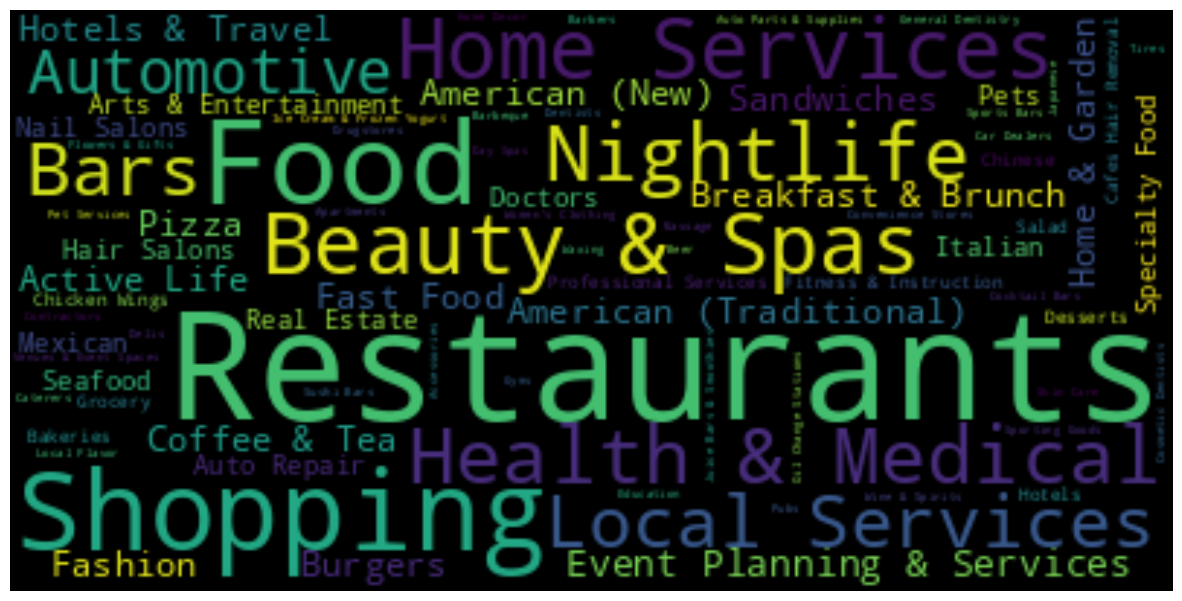

In [104]:
wordcloud = WordCloud().generate_from_frequencies(category_count)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
category_list = ["Active Life", "Arts & Entertainment", "Automotive", "Beauty & Spas", "Education", "Event Planning & Services", "Financial Services", "Food", "Health & Medical", "Home Services", "Hotels & Travel", "Local Flavor", "Local Services",  "Mass Media", "Nightlife", "Pets", "Professional Services", "Public Services & Government", "Religious Organizations", "Restaurants", "Shopping", "Others"]

In [106]:
test = business.copy(deep=False)
test = test.iloc[0:0]

category_df = []
category_count = []
for category in category_list:
  category_df.append(test.copy())
  category_count.append(0)

In [107]:
# Exporting the different business categories into individual dataframe

for index, x in enumerate(categories):
  status = False
  ilocdata = business.iloc[index]
  if not x:
    category_df[-1].loc[category_count[-1]] = ilocdata
    category_count[-1] += 1
    status = True

  for category_index, category in enumerate(category_list):
    if status:
      break

    if category in x:
      category_df[category_index].loc[category_count[category_index]] = ilocdata
      category_count[category_index] += 1
      status = True
  if not status:
    category_df[-1].loc[category_count[-1]] = ilocdata
    category_count[-1] += 1

In [108]:
# Exporting the dataframes into csv files
for index, dataframe in enumerate(category_df):
  path = ("/content/drive/MyDrive/Colab Notebooks/Export/" + category_list[index] + ".csv")
  print(path)
  dataframe.to_csv(path_or_buf=path)

/content/drive/MyDrive/Colab Notebooks/Export/Active Life.csv
/content/drive/MyDrive/Colab Notebooks/Export/Arts & Entertainment.csv
/content/drive/MyDrive/Colab Notebooks/Export/Automotive.csv
/content/drive/MyDrive/Colab Notebooks/Export/Beauty & Spas.csv
/content/drive/MyDrive/Colab Notebooks/Export/Education.csv
/content/drive/MyDrive/Colab Notebooks/Export/Event Planning & Services.csv
/content/drive/MyDrive/Colab Notebooks/Export/Financial Services.csv
/content/drive/MyDrive/Colab Notebooks/Export/Food.csv
/content/drive/MyDrive/Colab Notebooks/Export/Health & Medical.csv
/content/drive/MyDrive/Colab Notebooks/Export/Home Services.csv
/content/drive/MyDrive/Colab Notebooks/Export/Hotels & Travel.csv
/content/drive/MyDrive/Colab Notebooks/Export/Local Flavor.csv
/content/drive/MyDrive/Colab Notebooks/Export/Local Services.csv
/content/drive/MyDrive/Colab Notebooks/Export/Mass Media.csv
/content/drive/MyDrive/Colab Notebooks/Export/Nightlife.csv
/content/drive/MyDrive/Colab Noteboo

# Continue from after category seperation

In [9]:
export_dir = "/content/drive/MyDrive/Colab Notebooks/Export"

csv_list = os.listdir(export_dir)
new_category_df = []
for csv_name in csv_list:
  csv_path = os.path.join(export_dir, csv_name)
  new_category_df.append(pd.read_csv(csv_path))

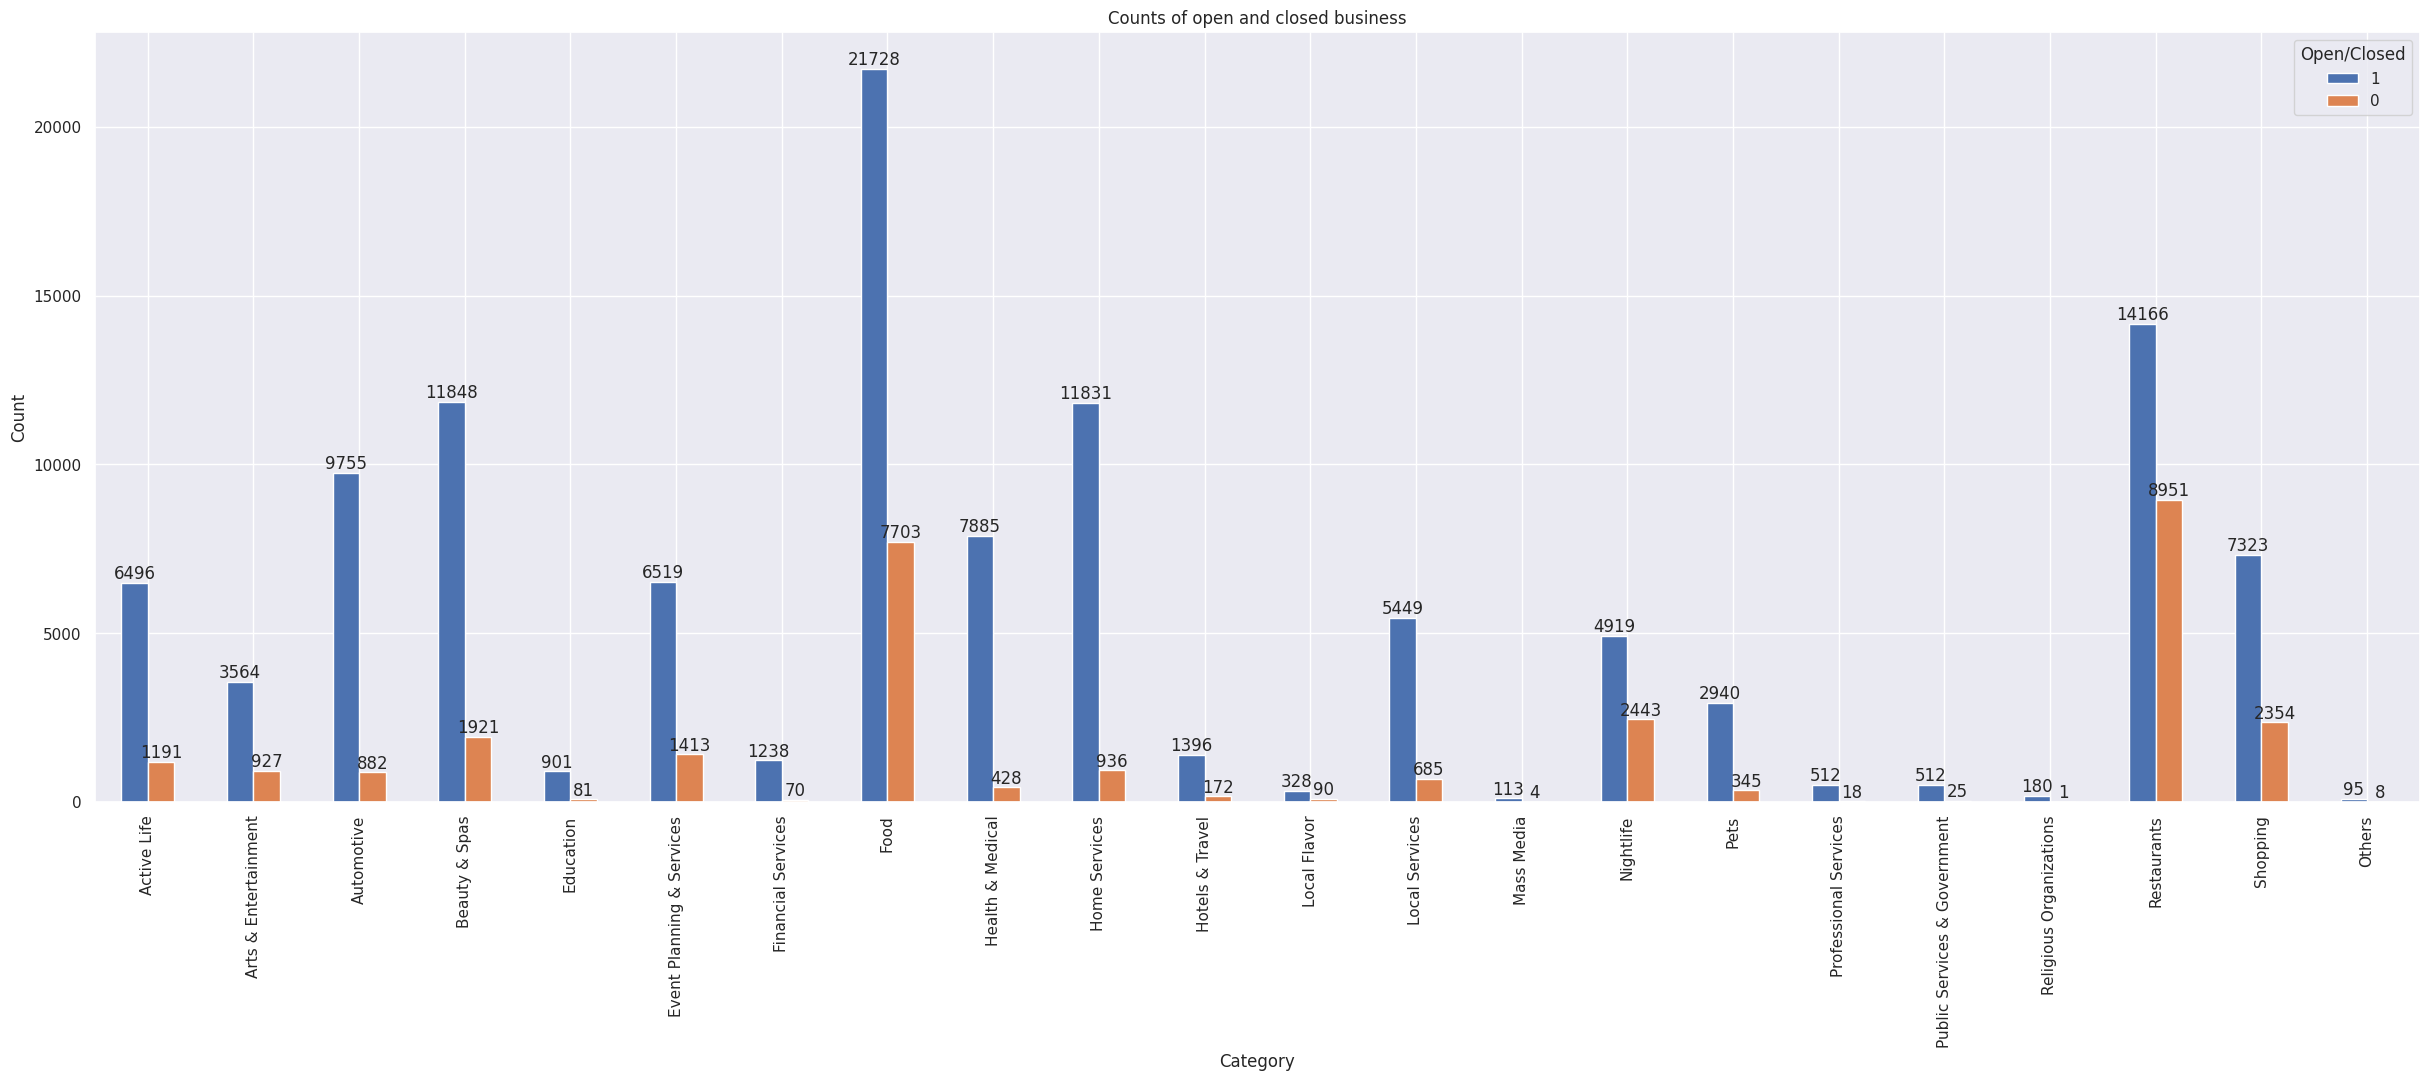

In [11]:
def count_open_closed(df):
  return df["is_open"].value_counts()

test_df = pd.DataFrame([count_open_closed(df) for df in new_category_df])
test_df.index = category_list

ax = test_df.plot(kind="bar", stacked = False)

for container in ax.containers:
  ax.bar_label(container)

plt.gcf().set_size_inches(30, 10)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Counts of open and closed business")
plt.legend(title = "Open/Closed")
plt.show()

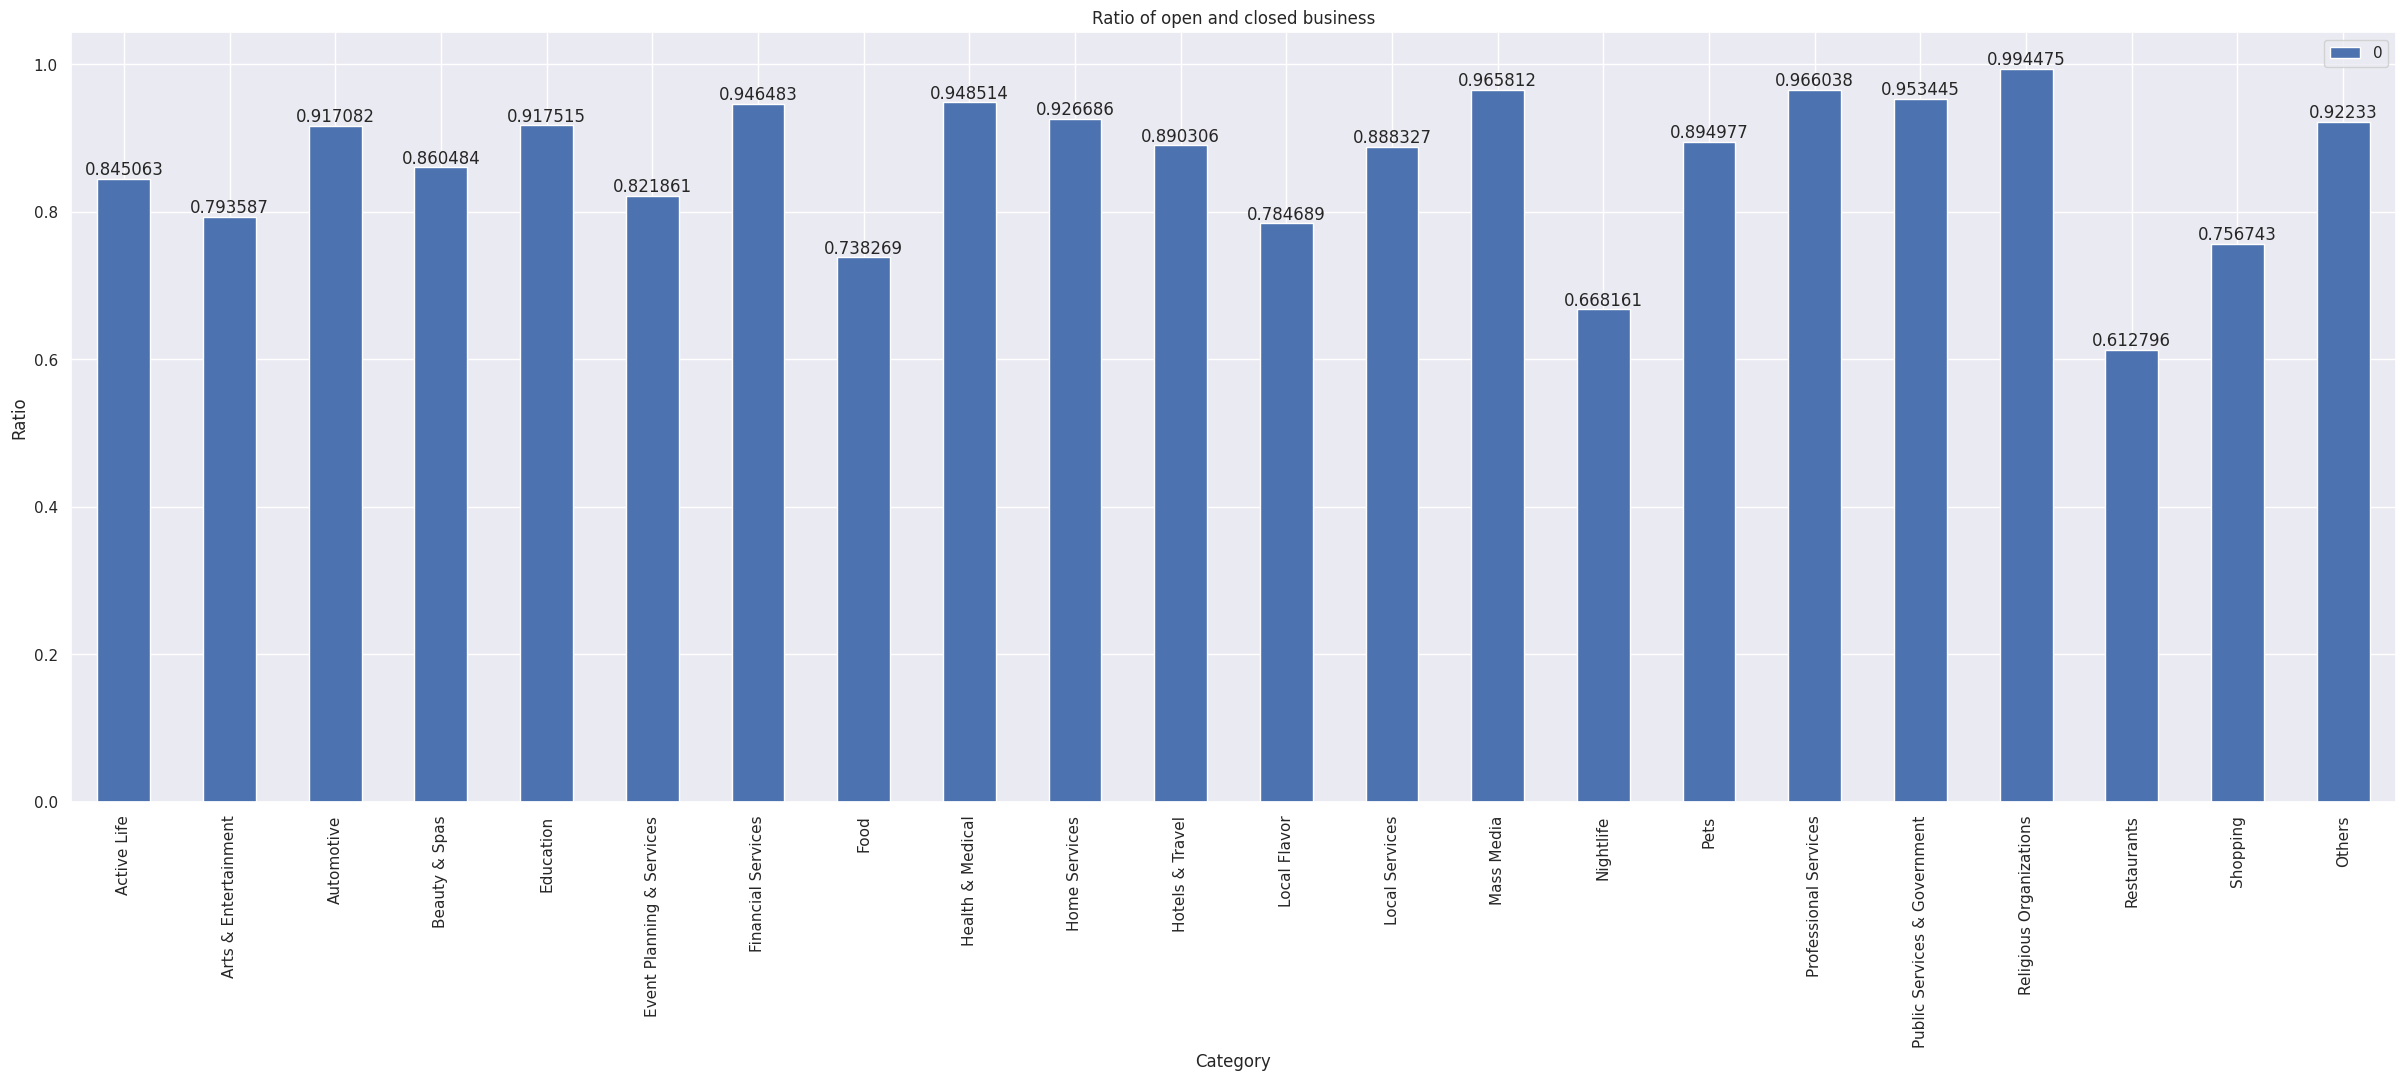

In [12]:
def count_open_closed(df):
  return df["is_open"].value_counts()

test_df = pd.DataFrame([count_open_closed(df) for df in new_category_df])

ratio_df = pd.DataFrame([((test_df[1][index]) / (test_df[1][index] + test_df[0][index])) for index, x in enumerate(category_list)])
ratio_df.index = category_list

ax = ratio_df.plot(kind="bar", stacked = False)

for container in ax.containers:
  ax.bar_label(container)

plt.gcf().set_size_inches(30, 10)
plt.xlabel("Category")
plt.ylabel("Ratio")
plt.title("Ratio of open and closed business")
plt.show()

Does the type of business affect wether it will stay open or closed

------------------

## Business Category Explanation

`Restaurants` is categorized to businesses where you can sit down and have a meal, typically with table service or a counter where you can order your foods.

`Food` is categorized as businesses that sell food items, but not necessarily in a sit-down dining format.

------------------

## Analysis

Based on the plotted graphs, we can easily see that `Food` is the MOST popular business option that people will open with a total number of `29431` businesses. However it has the second lowest ratio of surviving it business with a value of `0.738269`

Next `Restaurants` has the second highest number of business open, with the HIGHEST number of businesses closed with a ratio of `0.612795`. However, despite that, it has the second most businesses open currently as well.

Following from that we have `Beauty & Spas` and `Home Services` with high count of businesses open which both of the businesses have good ratio of businesses open with a value of `0.860483` and `0.926685` respectively.

`Religious Organizations` has the best ratio of business open with a value of `0.994475` however there is only a total number of `181` businesses from this category.

Based on the statistics and the visualization on the graph, we can see that certain type of busnesses do have a higher chance of staying open while there are certain businesses that will have a high probability of closing, like `Food` and `Restaurants`. However this is most likely due to the high total number of businesses open in that category, thus resulting in a high probrability of it closing as well.

<Figure size 100000x480 with 0 Axes>

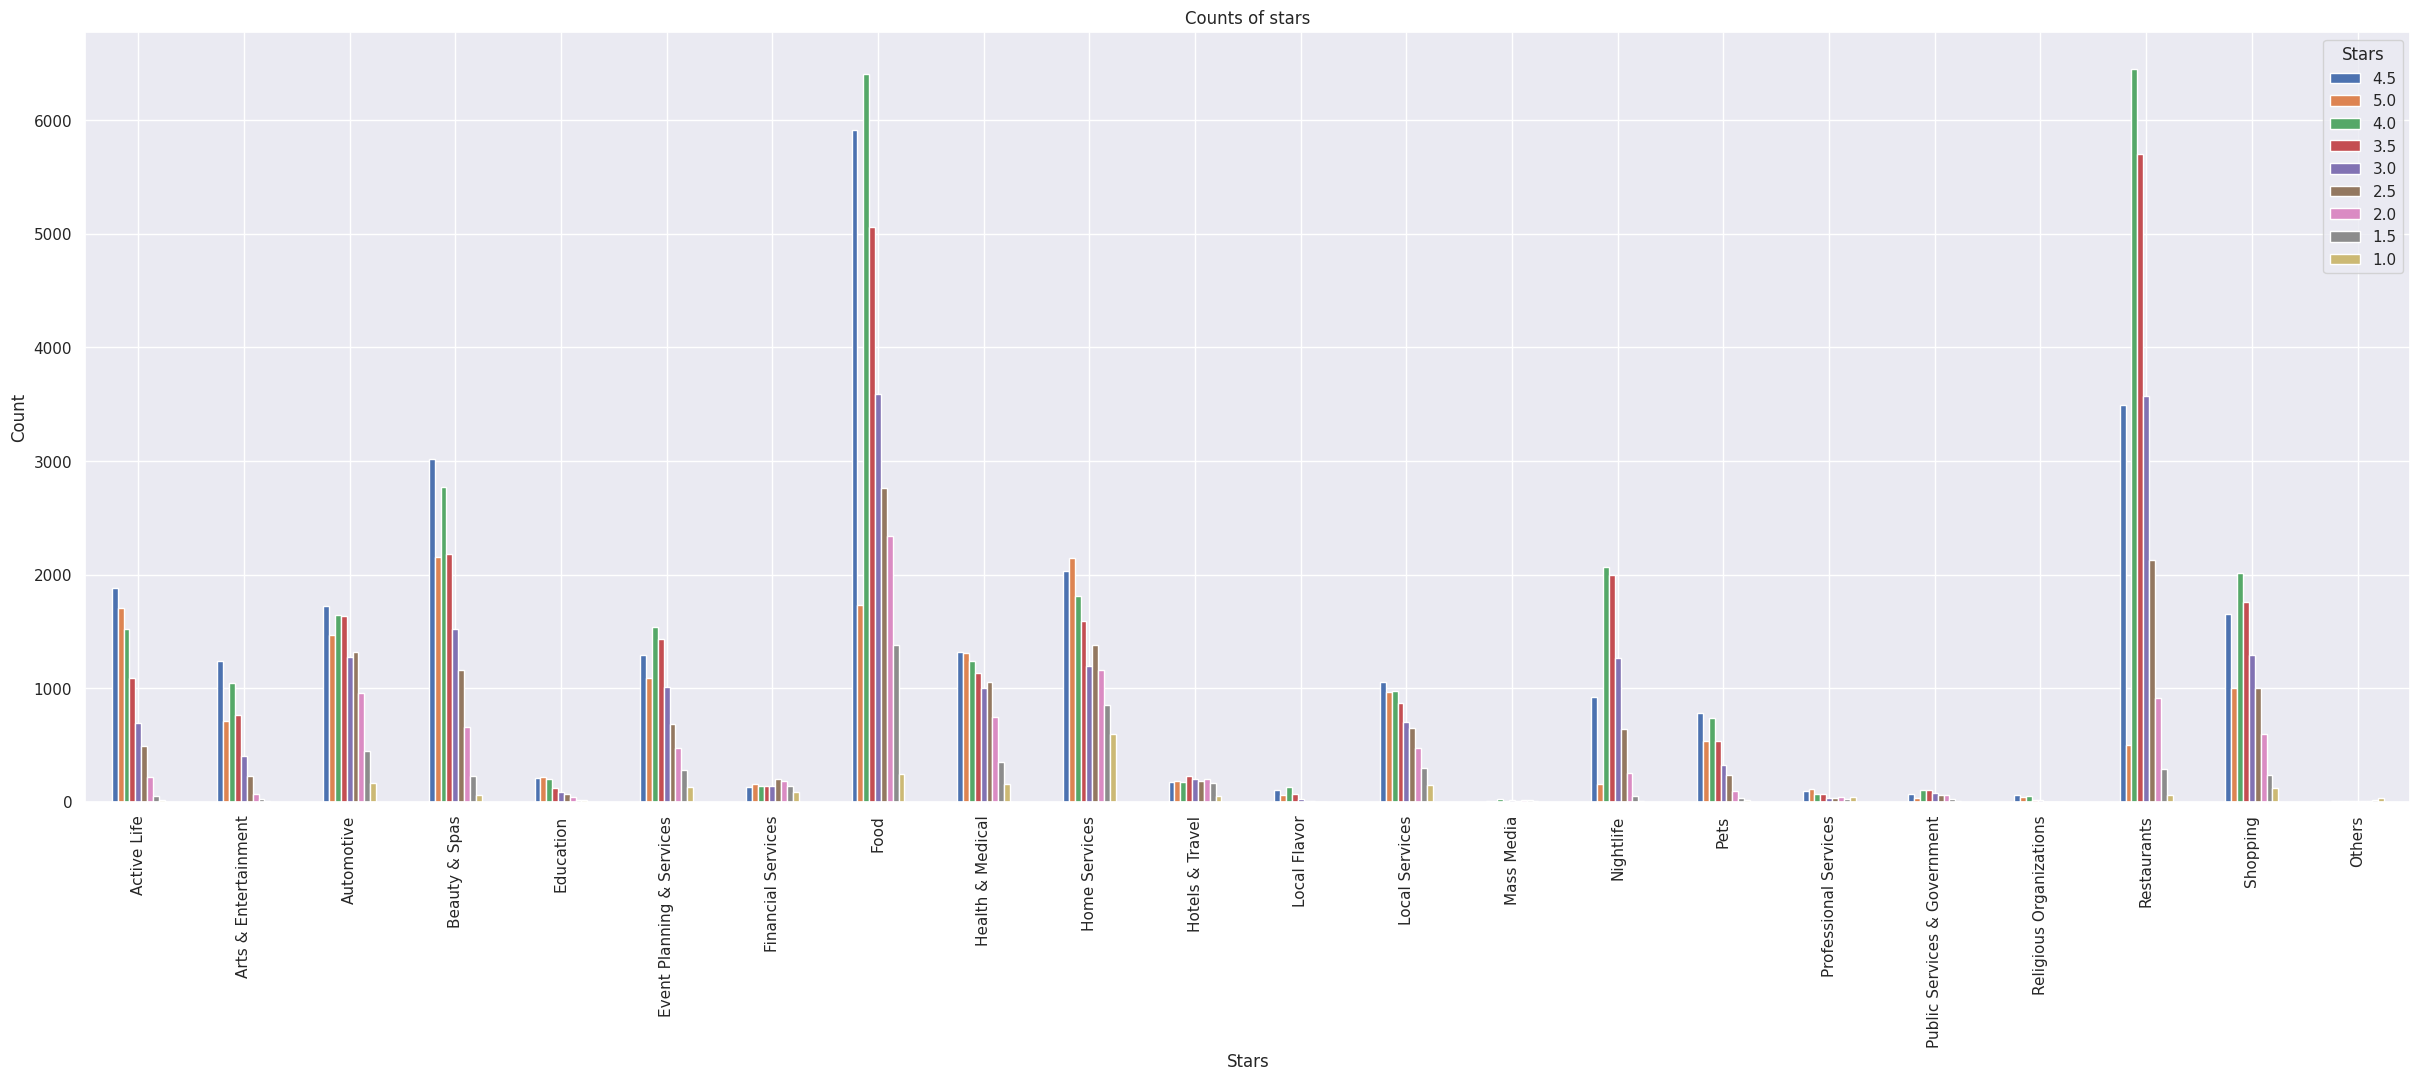

In [13]:
def count_stars(df):
  return df["stars"].value_counts()

test_df = pd.DataFrame([count_stars(df) for df in new_category_df])
test_df.index = category_list

plt.figure().set_figwidth(1000)

test_df.plot(kind="bar", stacked = False)

plt.gcf().set_size_inches(30, 10)
plt.xlabel("Stars")
plt.ylabel("Count")
plt.title("Counts of stars")
plt.legend(title = "Stars")
plt.show()

## Analysis

Naturally with `Food` and `Restaurants` being the most popular business option, we can see that they have the higher stars rating counts as well. Based on plain oberservation, we can see that the general stars rating falls between `4.5` to `3.5`